<a href="https://colab.research.google.com/github/derek-shing/ProofOfConcept/blob/master/OpenAI_trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd

In [ ]:


class Market():

    def get_data(self):

        #data provider URL: https://api.tiingo.com/

        token="bd6c49fc0c3f94a9c91d1f209cf901d9373169b1"
        headers = {
        'Content-Type': 'application/json',
        'Authorization' : 'Token '+token
        }
        url="https://api.tiingo.com/tiingo/daily/AAPL/prices?startDate=2012-1-1&endDate=2018-1-1 "

        requestResponse = requests.get(url,headers=headers)
        self.df_AAPL = pd.DataFrame(requestResponse.json())

        url="https://api.tiingo.com/tiingo/daily/MSI/prices?startDate=2012-1-1&endDate=2018-1-1 "

        requestResponse = requests.get(url,headers=headers)
        self.df_MSI = pd.DataFrame(requestResponse.json())

        url="https://api.tiingo.com/tiingo/daily/SBUX/prices?startDate=2012-1-1&endDate=2018-1-1 "

        requestResponse = requests.get(url,headers=headers)
        self.df_SBUX = pd.DataFrame(requestResponse.json())
        print(self.df_AAPL.head())
        print(self.df_MSI.head())
        print(self.df_SBUX.head())






In [ ]:
m = Market()
m.get_data()

                       date   close    high  ...  adjVolume  divCash  splitFactor
0  2012-01-03T00:00:00.000Z  411.23  412.50  ...   75555275      0.0          1.0
1  2012-01-04T00:00:00.000Z  413.44  414.68  ...   65005565      0.0          1.0
2  2012-01-05T00:00:00.000Z  418.03  418.55  ...   67817467      0.0          1.0
3  2012-01-06T00:00:00.000Z  422.40  422.75  ...   79573279      0.0          1.0
4  2012-01-09T00:00:00.000Z  421.73  427.75  ...   98506198      0.0          1.0

[5 rows x 13 columns]
                       date  close    high  ...  adjVolume  divCash  splitFactor
0  2012-01-03T00:00:00.000Z  46.62  47.410  ...    1697400      0.0          1.0
1  2012-01-04T00:00:00.000Z  46.36  46.540  ...    1797600      0.0          1.0
2  2012-01-05T00:00:00.000Z  46.67  46.780  ...    1598200      0.0          1.0
3  2012-01-06T00:00:00.000Z  46.55  46.921  ...    1188100      0.0          1.0
4  2012-01-09T00:00:00.000Z  46.18  46.550  ...    1960300      0.0          1.0

In [ ]:
m.df_AAPL.shape

(1509, 13)

In [ ]:
m.df_MSI.shape

(1509, 13)

In [ ]:
m.df_SBUX.shape

(1509, 13)

In [ ]:
m.df_AAPL.columns

Index(['date', 'close', 'high', 'low', 'open', 'volume', 'adjClose', 'adjHigh',
       'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'],
      dtype='object')

In [ ]:
m.df_AAPL[['date','close']]

,date,close
0,2012-01-03T00:00:00.000Z,411.23
1,2012-01-04T00:00:00.000Z,413.44
2,2012-01-05T00:00:00.000Z,418.03
3,2012-01-06T00:00:00.000Z,422.40
4,2012-01-09T00:00:00.000Z,421.73
...,...,...
1504,2017-12-22T00:00:00.000Z,175.01
1505,2017-12-26T00:00:00.000Z,170.57
1506,2017-12-27T00:00:00.000Z,170.60
1507,2017-12-28T00:00:00.000Z,171.08


In [ ]:
pd.unique(m.df_AAPL['splitFactor'])

array([1.      , 7.000007])

In [ ]:
new  =  pd.merge(m.df_AAPL[['date','close']],m.df_MSI[['date','close']], on='date')

In [ ]:
new2 = pd.merge(new,m.df_SBUX[['date','close']], on='date')

In [ ]:
new2

,date,close_x,close_y,close
0,2012-01-03T00:00:00.000Z,411.23,46.62,45.285
1,2012-01-04T00:00:00.000Z,413.44,46.36,46.170
2,2012-01-05T00:00:00.000Z,418.03,46.67,46.360
3,2012-01-06T00:00:00.000Z,422.40,46.55,46.720
4,2012-01-09T00:00:00.000Z,421.73,46.18,46.590
...,...,...,...,...
1504,2017-12-22T00:00:00.000Z,175.01,90.76,57.300
1505,2017-12-26T00:00:00.000Z,170.57,90.67,57.140
1506,2017-12-27T00:00:00.000Z,170.60,90.80,57.270
1507,2017-12-28T00:00:00.000Z,171.08,90.57,57.810


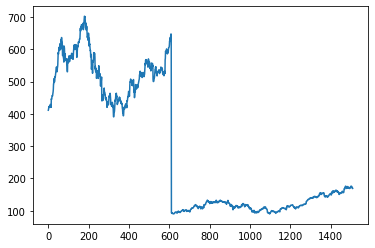

In [ ]:
new2['close_x'].plot()

In [ ]:
new2.to_csv('stock_price.csv',index=False)

In [ ]:
pip install gym

In [ ]:
import gym
import numpy as np
env = gym.make('CartPole-v0')
env.reset()

array([-0.00817191,  0.04741032,  0.04386243,  0.00638731])

In [ ]:
# turns list of integers into an int
# Ex.
# build_state([1,2,3,4,5]) -> 12345
def build_state(features):
  return int("".join(map(lambda feature: str(int(feature)), features)))

def to_bin(value, bins):
  return np.digitize(x=[value], bins=bins)[0]


class FeatureTransformer:
  def __init__(self):
    # Note: to make this better you could look at how often each bin was
    # actually used while running the script.
    # It's not clear from the high/low values nor sample() what values
    # we really expect to get.
    self.cart_position_bins = np.linspace(-2.4, 2.4, 9)
    self.cart_velocity_bins = np.linspace(-2, 2, 9) # (-inf, inf) (I did not check that these were good values)
    self.pole_angle_bins = np.linspace(-0.4, 0.4, 9)
    self.pole_velocity_bins = np.linspace(-3.5, 3.5, 9) # (-inf, inf) (I did not check that these were good values)

  def transform(self, observation):
    # returns an int
    cart_pos, cart_vel, pole_angle, pole_vel = observation
    return build_state([
      to_bin(cart_pos, self.cart_position_bins),
      to_bin(cart_vel, self.cart_velocity_bins),
      to_bin(pole_angle, self.pole_angle_bins),
      to_bin(pole_vel, self.pole_velocity_bins),
    ])


class Model:
  def __init__(self, env, feature_transformer):
    self.env = env
    self.feature_transformer = feature_transformer

    num_states = 10**env.observation_space.shape[0]
    num_actions = env.action_space.n
    self.Q = np.random.uniform(low=-1, high=1, size=(num_states, num_actions))

  def predict(self, s):
    x = self.feature_transformer.transform(s)
    return self.Q[x]

  def update(self, s, a, G):
    x = self.feature_transformer.transform(s)
    self.Q[x,a] += 1e-2*(G - self.Q[x,a])

  def sample_action(self, s, eps):
    if np.random.random() < eps:
      return self.env.action_space.sample()
    else:
      p = self.predict(s)
      return np.argmax(p)

In [ ]:
t= FeatureTransformer()
m =Model(env,t)

In [ ]:
m.Q.shape

(10000, 2)

In [ ]:
import numpy as np

In [ ]:
a = np.linspace(1,10,5)
print(a) # [ 1.    3.25  5.5   7.75 10.  ]

[ 1.    3.25  5.5   7.75 10.  ]


In [ ]:
type(a)

numpy.ndarray

In [ ]:
a*10

array([ 10. ,  32.5,  55. ,  77.5, 100. ])

In [ ]:
value= [1,4,7,3,9,6,12,-4]

In [ ]:
d =np.digitize(x=value, bins=a)

In [ ]:
d

array([1, 2, 3, 1, 4, 3, 5, 0])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


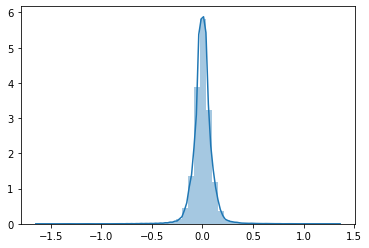

In [ ]:
import gym
import numpy as np
import seaborn as sns


env = gym.make('CartPole-v0')
env.reset()

def playgame(env,record):
    env.reset()
    done=False
    while not done:
        o,r,done,info = env.step(env.action_space.sample())
        record['CPosition'].append(o[0])
        record['CVelocity'].append(o[1])
        record['PoleAngle'].append(o[2])
        record['PoleVelcity'].append(o[3])
    return record


record ={
    'CPosition':[],
    'CVelocity':[],
    'PoleAngle':[],
    'PoleVelcity':[]
}
for i in range(10000):
    record = playgame(env,record)


sns.distplot(record['CPosition'])

In [ ]:
import pandas as pd
df = pd.DataFrame(record)

In [ ]:
df.describe()

,CPosition,CVelocity,PoleAngle,PoleVelcity
count,222203.000000,222203.000000,222203.000000,222203.000000
mean,-0.000093,-0.001087,-0.000087,0.001441
std,0.099529,0.567713,0.103284,0.855175
min,-1.641130,-3.041876,-0.266585,-3.594882
25%,-0.043978,-0.376555,-0.061732,-0.564936
50%,0.000326,0.000200,-0.000276,-0.000010
75%,0.044084,0.375601,0.061156,0.566465
max,1.523443,2.860015,0.267821,3.420588


In [ ]:
def to_bin(value):
    s=[]
    cart_position_bins = np.linspace(-2.4, 2.4, 9)
    cart_velocity_bins = np.linspace(-2, 2, 9) # (-inf, inf) (I did not check that these were good values)
    pole_angle_bins = np.linspace(-0.4, 0.4, 9)
    pole_velocity_bins = np.linspace(-3.5, 3.5, 9) # (-inf, inf) (I did not check that these were good values)
    s.append(np.digitize(value[0], cart_position_bins))
    s.append(np.digitize(value[1], cart_velocity_bins))
    s.append(np.digitize(value[2], pole_angle_bins))
    s.append(np.digitize(value[3], pole_velocity_bins))
    return s

In [ ]:
o,r,done,info = env.step(env.action_space.sample())

In [ ]:
print(o)

[-0.16787949  0.18396949  0.44200843  0.95975119]


In [ ]:
to_bin(o)

[4, 5, 9, 6]

In [ ]:
num_states = 10**4
num_actions =2

Q = np.random.uniform(low=-1, high=1, size=(num_states, num_actions))

In [ ]:
type(Q)

numpy.ndarray

In [ ]:
Q

array([[-0.25592997, -0.07952782],
       [-0.70880797,  0.4559391 ],
       [ 0.93110215,  0.04042307],
       ...,
       [-0.26030868, -0.56602788],
       [ 0.88264669, -0.5267375 ],
       [ 0.20083898,  0.88579978]])

In [ ]:
Q[0][0]

-0.25592996893891273

In [ ]:
# https://deeplearningcourses.com/c/deep-reinforcement-learning-in-python
# https://www.udemy.com/deep-reinforcement-learning-in-python
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
#       if builtins is not defined
# sudo pip install -U future

import gym
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gym import wrappers
from datetime import datetime


# turns list of integers into an int
# Ex.
# build_state([1,2,3,4,5]) -> 12345
def build_state(features):
  return int("".join(map(lambda feature: str(int(feature)), features)))

def to_bin(value, bins):
  return np.digitize(x=[value], bins=bins)[0]


class FeatureTransformer:
  def __init__(self):
    # Note: to make this better you could look at how often each bin was
    # actually used while running the script.
    # It's not clear from the high/low values nor sample() what values
    # we really expect to get.
    self.cart_position_bins = np.linspace(-2.4, 2.4, 9)
    self.cart_velocity_bins = np.linspace(-2, 2, 9) # (-inf, inf) (I did not check that these were good values)
    self.pole_angle_bins = np.linspace(-0.4, 0.4, 9)
    self.pole_velocity_bins = np.linspace(-3.5, 3.5, 9) # (-inf, inf) (I did not check that these were good values)

  def transform(self, observation):
    # returns an int
    cart_pos, cart_vel, pole_angle, pole_vel = observation
    return build_state([
      to_bin(cart_pos, self.cart_position_bins),
      to_bin(cart_vel, self.cart_velocity_bins),
      to_bin(pole_angle, self.pole_angle_bins),
      to_bin(pole_vel, self.pole_velocity_bins),
    ])


class Model:
  def __init__(self, env, feature_transformer):
    self.env = env
    self.feature_transformer = feature_transformer

    num_states = 10**env.observation_space.shape[0]
    num_actions = env.action_space.n
    self.Q = np.random.uniform(low=-1, high=1, size=(num_states, num_actions))

  def predict(self, s):
    x = self.feature_transformer.transform(s)
    print(x)
    return self.Q[x]

  def update(self, s, a, G):
    x = self.feature_transformer.transform(s)
    self.Q[x,a] += 1e-2*(G - self.Q[x,a])

  def sample_action(self, s, eps):
    if np.random.random() > eps:
      return self.env.action_space.sample()
      print('hello')
    else:
      p = self.predict(s)
      print(p)
      return np.argmax(p)


def play_one(model, eps, gamma):
  observation = env.reset()
  done = False
  totalreward = 0
  iters = 0
  while not done and iters < 10000:
    action = model.sample_action(observation, eps)
    prev_observation = observation
    observation, reward, done, info = env.step(action)

    totalreward += reward

    if done and iters < 199:
      reward = -300

    # update the model
    G = reward + gamma*np.max(model.predict(observation))
    print(model.predict(observation))
    model.update(prev_observation, action, G)

    iters += 1

  return totalreward


def plot_running_avg(totalrewards):
  N = len(totalrewards)
  running_avg = np.empty(N)
  for t in range(N):
    running_avg[t] = totalrewards[max(0, t-100):(t+1)].mean()
  plt.plot(running_avg)
  plt.title("Running Average")
  plt.show()





In [ ]:
if __name__ == '__main__':
  env = gym.make('CartPole-v0')
  ft = FeatureTransformer()
  model = Model(env, ft)
  gamma = 0.9

  if 'monitor' in sys.argv:
    filename = os.path.basename(__file__).split('.')[0]
    monitor_dir = './' + filename + '_' + str(datetime.now())
    env = wrappers.Monitor(env, monitor_dir)

  N = 10000
  totalrewards = np.empty(N)
  for n in range(N):
    eps = 1.0/np.sqrt(n+1)
    totalreward = play_one(model, eps, gamma)
    totalrewards[n] = totalreward
    if n % 100 == 0:
      print("episode:", n, "total reward:", totalreward, "eps:", eps)
  print("avg reward for last 100 episodes:", totalrewards[-100:].mean())
  print("total steps:", totalrewards.sum())

  plt.plot(totalrewards)
  plt.title("Rewards")
  plt.show()

  plot_running_avg(totalrewards)

In [ ]:
observation = env.reset()
action = model.sample_action(observation, eps)
prev_observation = observation
observation, reward, done, info = env.step(action)

In [ ]:
model.sample_action(observation,eps)

0

In [ ]:
for n in range(10):
  observation = env.reset()
  done = False
  totalreward = 0
  iters = 0
  while not done and iters < 10000:
    action = model.sample_action(observation, eps)
    prev_observation = observation
    observation, reward, done, info = env.step(action)
    feature_transformer = FeatureTransformer()
    print(feature_transformer.transform(observation))
    model.predict(observation)

    totalreward += reward


In [ ]:
x =5
x = x +3

In [ ]:
print(x)

8


In [1]:
from sklearn.kernel_approximation import RBFSampler
import gym

In [7]:
env = gym.make('CartPole-v1')
env.reset()
env.action_space


Discrete(2)

In [ ]:
done = False
while not done:
  env.render()
  action = env.action_space.sample()
  o, r, done, infro = env.step(action)
  

In [ ]:
import gym
env = gym.make('CartPole-v0')
for i_episode in range(20):
    observation = env.reset()
    for t in range(100):
        env.render()
        print(observation)
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()

In [ ]:
RBFSampler.